# PCA on images

My first notebook ever! :)

Load an image and do various grayscale transformations.

### 2D plots

<IPython.core.display.Javascript object>


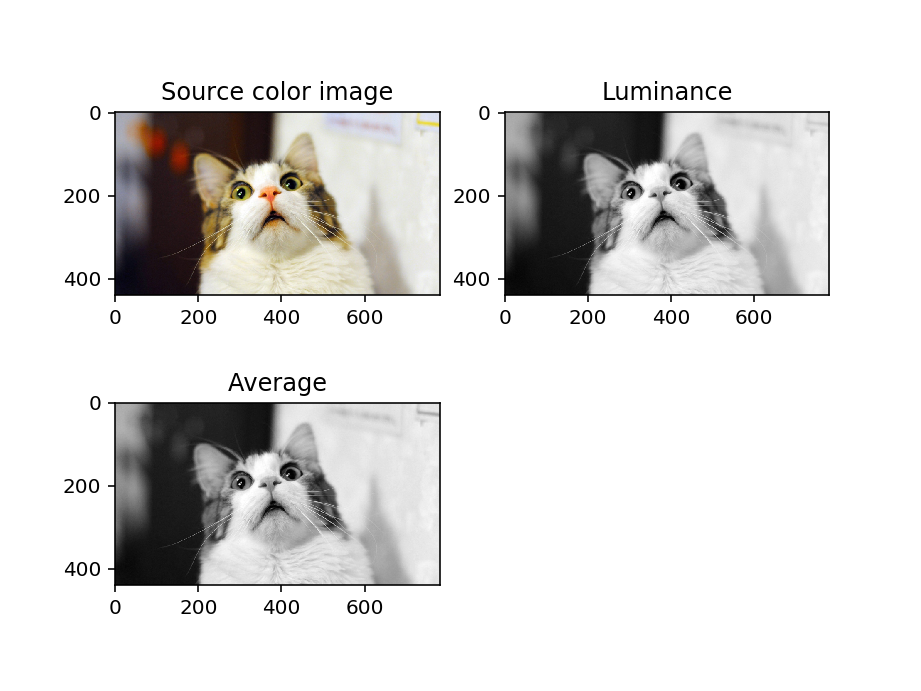

Text(0.5, 1.0, 'Average')

In [97]:
%matplotlib notebook

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cat_src = Image.open("images/cat1.jpg")
cat_array = np.array(cat_src, dtype=np.float32) / 255

cat_avg = cat_array[:,:,0] + cat_array[:,:,1] + cat_array[:,:,2]
cat_avg /= 3

cat_lum = np.dot(cat_array, [0.299, 0.587, 0.114])

# 2d plotting
fig2d = plt.figure(dpi=120)

plot = fig2d.add_subplot(221)
imgplot = plt.imshow(cat_src)
plot.set_title('Source color image')

plot = fig2d.add_subplot(222)
imgplot = plt.imshow(cat_lum, cmap="gray", vmin=0, vmax=1)
plot.set_title('Luminance')

plot = fig2d.add_subplot(223)
imgplot = plt.imshow(cat_avg, cmap="gray", vmin=0, vmax=1)
plot.set_title('Average')

### 3D plots

<IPython.core.display.Javascript object>


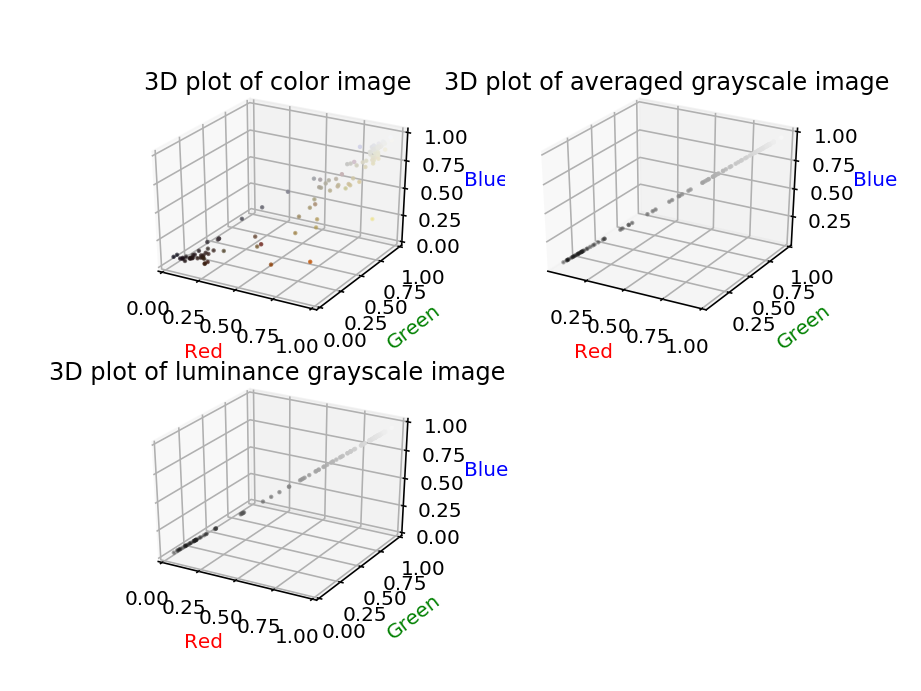

Text(0.5, 0.92, '3D plot of luminance grayscale image')

In [132]:
dim = np.array(cat_src.size) / 50
dim = dim.astype(int)

cat_src_small = cat_src.resize(dim)
cat_array_small = np.array(cat_src_small, dtype=np.float32) / 255

cat_avg_small = cat_array_small[:,:,0] + cat_array_small[:,:,1] + cat_array_small[:,:,2]
cat_avg_small /= 3

cat_lum_small = np.dot(cat_array_small, [0.299, 0.587, 0.114])

dim = cat_array_small.shape

color_array = np.resize(cat_array_small, (dim[0]*dim[1], 3))
avg_array = cat_avg_small.flatten()
lum_array = cat_lum_small.flatten()

# 3d plotting
fig3d = plt.figure(dpi=120)
marker = "."
s = 6

ax = fig3d.add_subplot(221, projection="3d")
x = cat_array_small[:,:,0].flatten()
y = cat_array_small[:,:,1].flatten()
z = cat_array_small[:,:,2].flatten()
ax.scatter(x,y,z, s=s, marker=marker, c=color_array)
ax.set_xlabel('Red', color="r")
ax.set_ylabel('Green', color="g")
ax.set_zlabel('Blue', color="b")
ax.set_title("3D plot of color image")

ax = fig3d.add_subplot(222, projection="3d")
x = y = z = cat_avg_small.flatten()
ax.scatter(x,y,z, s=s, marker=marker, c=avg_array, cmap="gray", vmin=0, vmax=1)
ax.set_xlabel('Red', color="r")
ax.set_ylabel('Green', color="g")
ax.set_zlabel('Blue', color="b")
ax.set_title("3D plot of averaged grayscale image")

ax = fig3d.add_subplot(223, projection="3d")
x = y = z = cat_lum_small.flatten()
ax.scatter(x,y,z, s=s, marker=marker, c=lum_array, cmap="gray", vmin=0, vmax=1)
ax.set_xlabel('Red', color="r")
ax.set_ylabel('Green', color="g")
ax.set_zlabel('Blue', color="b")
ax.set_title("3D plot of luminance grayscale image")